# 📈 Sales Forecasting using ARIMA & SARIMA

This notebook applies ARIMA and SARIMA models to forecast monthly sales using time series analysis. We use the furniture sales data from the Superstore dataset to explore seasonal trends and predict future demand.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import os

warnings.filterwarnings("ignore")

In [2]:
# Create 'plots' directory if not exists
os.makedirs("plots", exist_ok=True)


In [3]:
# Load CSV
df = pd.read_csv("../data/Sample - Superstore.csv", encoding='ISO-8859-1')

In [4]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
# Create a monthly sales dataframe
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

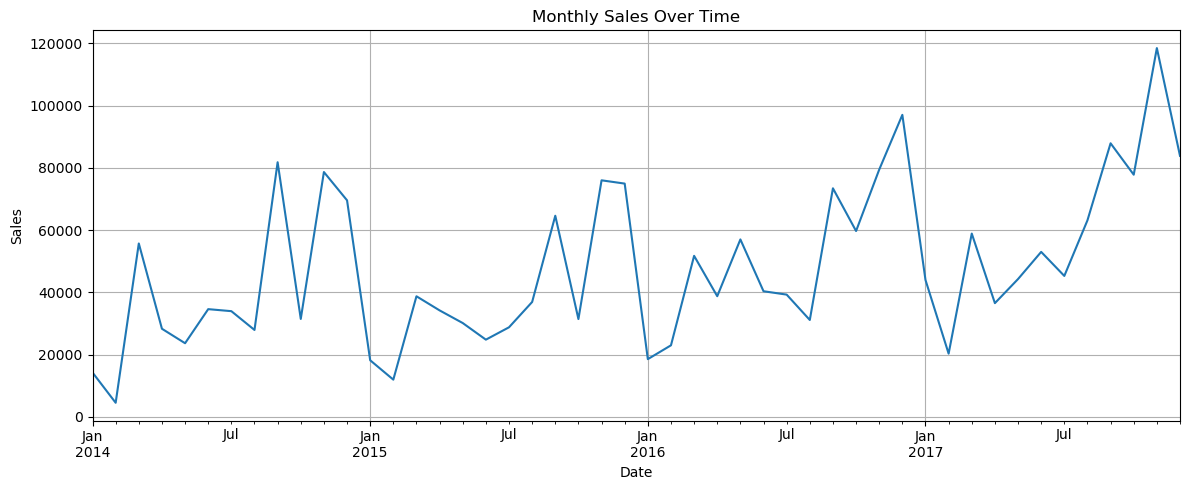

In [6]:
# Plot 1: Monthly Sales Over Time
plt.figure(figsize=(12, 5))
monthly_sales.plot()
plt.title("Monthly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/monthly_sales_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# SARIMA Model
sarima_model = SARIMAX(monthly_sales, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_results = sarima_model.fit()
sarima_forecast = sarima_results.get_forecast(steps=12)
sarima_ci = sarima_forecast.conf_int()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15862D+00    |proj g|=  4.86344D-01

At iterate    5    f=  8.00093D+00    |proj g|=  2.61677D-02

At iterate   10    f=  7.98782D+00    |proj g|=  2.03564D-02

At iterate   15    f=  7.98566D+00    |proj g|=  2.80616D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   8.662D-06   7.986D+00
  F =   7.9856344212836943     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


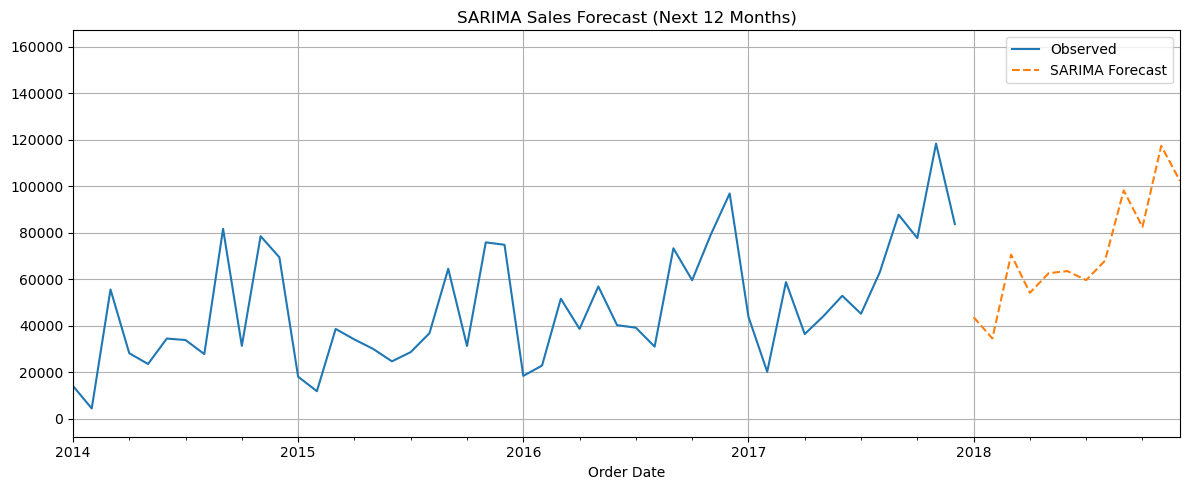

In [8]:
# Plot 2: SARIMA Forecast
plt.figure(figsize=(12, 5))
monthly_sales.plot(label='Observed')
sarima_forecast.predicted_mean.plot(label='SARIMA Forecast', linestyle='--')
plt.fill_between(sarima_ci.index, sarima_ci.iloc[:, 0], sarima_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("SARIMA Sales Forecast (Next 12 Months)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/sarima_forecast_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# ARIMA Model (no seasonality)
arima_model = ARIMA(monthly_sales, order=(1,1,1))
arima_results = arima_model.fit()
arima_forecast = arima_results.get_forecast(steps=12)
arima_ci = arima_forecast.conf_int()

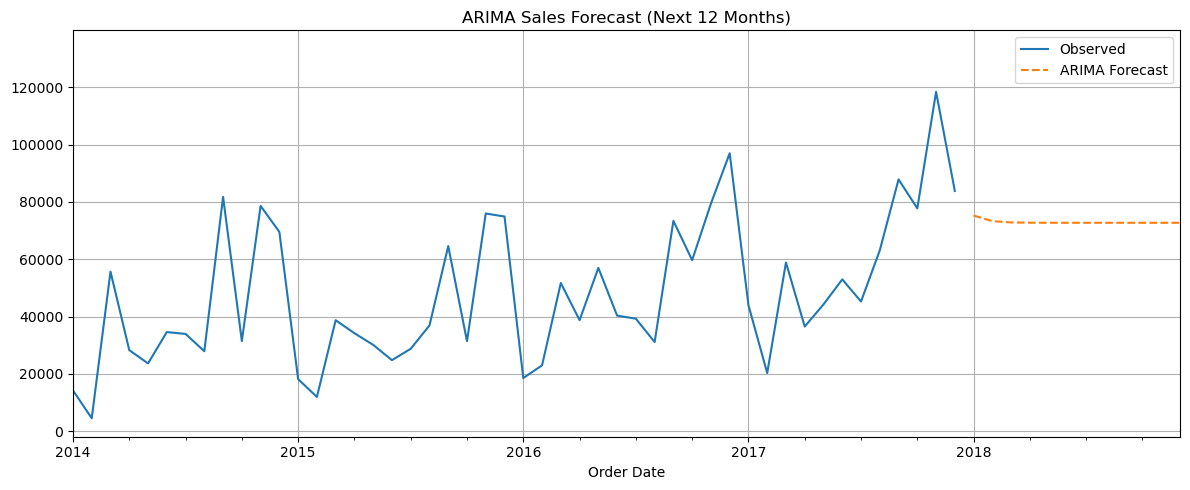

In [10]:
# Plot 3: ARIMA Forecast
plt.figure(figsize=(12, 5))
monthly_sales.plot(label='Observed')
arima_forecast.predicted_mean.plot(label='ARIMA Forecast', linestyle='--')
plt.fill_between(arima_ci.index, arima_ci.iloc[:, 0], arima_ci.iloc[:, 1], color='lightblue', alpha=0.3)
plt.title("ARIMA Sales Forecast (Next 12 Months)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/arima_forecast_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Compare RMSE
train = monthly_sales[:-12]
test = monthly_sales[-12:]

In [12]:
# SARIMA RMSE
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_results = sarima_model.fit()
sarima_pred = sarima_results.get_forecast(steps=12).predicted_mean
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_pred))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47472D+00    |proj g|=  1.27572D+00

At iterate    5    f=  6.93104D+00    |proj g|=  5.95495D-02

At iterate   10    f=  6.91508D+00    |proj g|=  4.33913D-02

At iterate   15    f=  6.90641D+00    |proj g|=  6.97110D-03

At iterate   20    f=  6.90455D+00    |proj g|=  1.31198D-03

At iterate   25    f=  6.90357D+00    |proj g|=  5.79436D-04

At iterate   30    f=  6.90350D+00    |proj g|=  6.10195D-04

At iterate   35    f=  6.90348D+00    |proj g|=  3.55143D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [13]:
# ARIMA RMSE
arima_model = ARIMA(train, order=(1,1,1))
arima_results = arima_model.fit()
arima_pred = arima_results.get_forecast(steps=12).predicted_mean
arima_rmse = np.sqrt(mean_squared_error(test, arima_pred))

In [14]:
print("Model Performance Comparison (RMSE):")
print(f"ARIMA  RMSE: {arima_rmse:.2f}")
print(f"SARIMA RMSE: {sarima_rmse:.2f}")

Model Performance Comparison (RMSE):
ARIMA  RMSE: 27208.45
SARIMA RMSE: 19683.80


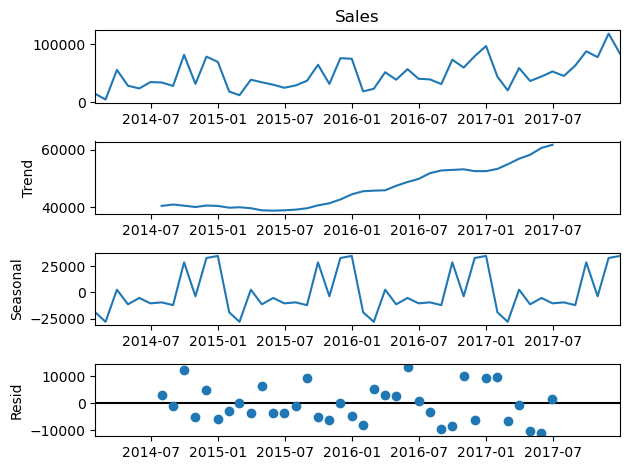

In [15]:
# Decomposition Plot
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.tight_layout()
plt.savefig("plots/decomposition_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Save forecast
forecast_df = pd.DataFrame({
    "Forecast": sarima_forecast.predicted_mean.round(2),
    "Lower CI": sarima_ci.iloc[:, 0].round(2),
    "Upper CI": sarima_ci.iloc[:, 1].round(2)
})
forecast_df.to_csv("sales_forecast.csv")